In [1]:
import sys 
import os
sys.path.append(r'/Users/kostastsampourakis/Desktop/code/Python/projects/neuralssm/src/neuralssm')
import argparse
import jax.numpy as jnp
import jax.random as jr
import time
import util.io
import experiment_descriptor as ed
import misc
import util.plot
import matplotlib.pyplot as plt
import tensorflow_probability.substrates.jax.distributions as tfd # type: ignore
import main 
exp_root = '/Users/kostastsampourakis/Desktop/code/Python/projects/neuralssm/src/neuralssm/exps/'
data_root = '/Users/kostastsampourakis/Desktop/code/Python/projects/neuralssm/src/neuralssm/data/experiments/'

## Run experiment

In [2]:
run = False
if run:
    exp_file = exp_root + 'exp0.txt'
    sys.argv = ['', 'trials', '13434', '1', '2', exp_file] 
    args = main.parse_args()
    args.func(args)

## View experiment

In [3]:
view = False
trial = 1
if view:
    for trial in range(1, 3):
        exp_file = exp_root + 'exp0.txt'
        sys.argv = ['', 'view', '-t', f'{trial}', exp_file]
        args = main.parse_args()
        args.func(args)

In [4]:
view = False
trial = 1
if view:
    for trial in range(1, 2):
        exp_file = exp_root + 'new_exp.txt'
        sys.argv = ['', 'view', '-t', f'{trial}', exp_file]
        args = main.parse_args()
        args.func(args)

In [5]:
view = False
trial = 1
if view:
    for trial in range(1, 2):
        exp_file = exp_root + 'lgssm_bpf_mcmc.txt'
        sys.argv = ['', 'view', '-t', f'{trial}', exp_file]
        args = main.parse_args()
        args.func(args)

In [6]:
view = False
start_trial = 1
end_trial = 11
if view:
    for trial in range(1, 5): #range(start_trial, end_trial):
        exp_file = exp_root + 'lgssm_tsnl_test.txt'
        sys.argv = ['', 'view', '-t', f'{trial}', '-o', 'true', exp_file]
        args = main.parse_args()
        args.func(args)

In [7]:
view = False
if view:
    exp_root = '/Users/kostastsampourakis/Desktop/code/Python/projects/neuralssm/src/neuralssm/exps/'
    for trial in range(1, 11):
        exp_file = exp_root + 'lgssm_abc.txt'
        sys.argv = ['', 'view', '-t', f'{trial}', exp_file]
        args = main.parse_args()
        args.func(args)

In [18]:

def get_error(exp_dir, n_trials):

    errors = []
    mmds = []
    dists = []
    true_cps_trials = []
    observations_trials = []
    all_emissions_trials = []
    post_cps_trials = []
    
    for trial in range(1, n_trials+1):
        

        try:

            error, _ = util.io.load(os.path.join(exp_dir + f'/{trial}', 'error'))
            all_emissions = util.io.load(os.path.join(exp_dir + f'/{trial}', 'all_emissions'))
            (true_ps, true_cps), observations =  util.io.load(os.path.join(exp_dir + f'/{trial}', 'gt'))
            all_dists = util.io.load(os.path.join(exp_dir + f'/{trial}', 'all_dists'))
            mmd = util.io.load(os.path.join(exp_dir + f'/{trial}', 'mmd'))
            # info = util.io.load(os.path.join(sim_dir+inf_dir, 'info'))
            _, post_cps = util.io.load(os.path.join(exp_dir + f'/{trial}', 'posterior'))

            errors.append(error)
            mmds.append(mmd)
            dists.append(all_dists)
            all_emissions_trials.append(all_emissions)
            post_cps_trials.append(post_cps)
            true_cps_trials.append(true_cps)
            observations_trials.append(observations)

        except FileNotFoundError:

            print(f'File {exp_dir}/{str(trial)} not found')

            continue

    out = {
        'errors': jnp.array(errors),
        'dists': jnp.array(dists),
        'mmd' : jnp.array(mmds),
        'true_cps_trials': true_cps_trials,
        'observations_trials': jnp.array(observations_trials),
        'all_emissions_trials': jnp.array(all_emissions_trials),
        'post_cps_trials': jnp.array(post_cps_trials)
        }

    return out

def get_exp_dir(inf,
                sim,
                state_dim,
                emission_dim,
                num_timesteps,
                vars,
                num_samples,
                num_rounds,
                train_on,
                subsample,
                mcmc_steps,
                lag,
                dhidden):

    if inf == 'snl':

        inf_dir = f'nde/snl/samples_{num_samples}_rounds_{num_rounds}_train_on_{train_on}_mcmc_steps_{mcmc_steps}/maf_nmades_5_dhidden_32_nhiddens_5'

    elif inf == 'tsnl':

        inf_dir = f'nde/tsnl/samples_{num_samples}_rounds_{num_rounds}_lag_{lag}_subsample_{subsample}_train_on_{train_on}_mcmc_steps_{mcmc_steps}/maf_nmades_5_dhidden_{dhidden}_nhiddens_5'

    if sim == 'lvssm':

        sim_dir = data_root + f'{sim}/emission-dim_{emission_dim}_num-timesteps_{num_timesteps}_target-vars_{vars}/'
        
    elif sim == 'svssm':

        sim_dir = data_root + f'{sim}/state-dim_{state_dim}_emission-dim_{emission_dim}_num-timesteps_{num_timesteps}_target-vars_{vars}/'

    elif sim == 'lgssm':

        sim_dir = data_root + f'{sim}/state-dim_{state_dim}_emission-dim_{emission_dim}_num-timesteps_{num_timesteps}_target-vars_{vars}/'

    exp_dir = sim_dir + inf_dir

    return exp_dir
    
view = True

if view:

    snl_exp_dir = get_exp_dir('snl', 'lgssm', state_dim=1, emission_dim=1, num_timesteps=100, vars='d4', num_samples=10, num_rounds=5, train_on='best', subsample=None, mcmc_steps=1000, lag=-1, dhidden=32)
    tsnl_exp_dir = get_exp_dir('tsnl', 'lgssm', state_dim=1, emission_dim=1, num_timesteps=100, vars='d4', num_samples=10, num_rounds=5, train_on='best', subsample=1.0, mcmc_steps=1000, lag=10, dhidden=32)

    out_snl = get_error(snl_exp_dir, 100)
    out_tsnl = get_error(tsnl_exp_dir, 100)

In [ ]:
particles = out_tsnl['post_cps_trials'][0]
plt.hist(particles.flatten(), bins=100)
plt.show()

In [13]:
out_tsnl['mmd']

Array([        nan,         nan,         nan,         nan,         nan,
        0.05170902,  0.15861039,         nan,  0.07858302,         nan,
        0.07568675,  0.24203888,         nan,  0.01561842,         nan,
               nan,  0.13900994,         nan,         nan,  0.07725108,
               nan,         nan,         nan,         nan,         nan,
               nan,  0.11989975,         nan,  0.00487484,         nan,
               nan,  0.07732685,  0.01106211, -0.0054007 ,         nan,
        0.07686909,         nan,         nan,  0.0797287 ,  0.07060287,
               nan,  0.12240881,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,  0.07378405,
               nan,         nan,         nan,  0.09828744,  0.00907204,
               nan,  0.02031284,  0.2333915 ,  0.06238081,  0.09432015,
               nan,  0.04427718,         nan,  0.042776  ,  0.0727933 ,
               nan,         nan,         nan,         nan,      

In [14]:
jnp.mean(out_snl['mmd']), jnp.mean(out_tsnl['mmd'])

(Array(0.45066747, dtype=float32), Array(nan, dtype=float32))

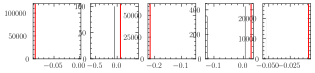

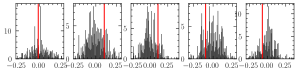

In [15]:
fig1, ax1 = plt.subplots(1, 5, figsize=(5, 1))

for i in range(0, 5):

    try:

        ax1[i].hist(post_trials_snl[i].flatten(), bins=100, density=True)
        ax1[i].axvline(x=true_cps_snl[i], color='r')

    except:

        print(f'No data for trial {i}')

fig2, ax2 = plt.subplots(1, 5, figsize=(5, 1))

for i in range(0, 5):

    try:

        ax2[i].hist(post_trials_tsnl[i].flatten(), bins=100, density=True)
        ax2[i].axvline(x=true_cps_tsnl[i], color='r')

    except:

        print(f'No data for trial {i}')

plt.show()